In [15]:
import npdists
import astropy.units as u

# Example 1: Gaussian with Custom `wrap_at`

Let's create a [Gaussian distribution](../api/Gaussian.md) centered around 10, and tell `npdists` to wrap the distribution at 12.  Whenever we call sample, values that extend beyone 10 will be wrapped onto the range `[0-10]`.

*** x passed to dist_func -1.7474529593611028 20.45389533172419


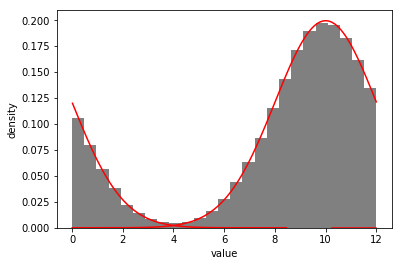

In [16]:
g = npdists.gaussian(10, 2, wrap_at=12)
out = g.plot(show=True)

To _temporarily_ disable wrapping, just pass `wrap_at=False` to [sample](../api/Gaussian.sample.md) or [plot](../api/Gaussian.plot.md).

*** x passed to dist_func -0.13218877025551645 20.43521904280955


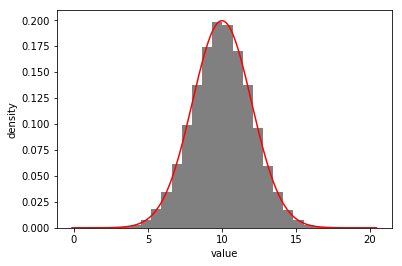

In [17]:
out = g.plot(show=True, wrap_at=False)

To _temporarily_ use a different value for wrapping, pass that value to `wrap` in [sample](../api/Gaussian.sample.md) or [plot](../api/Gaussian.plot.md)

*** x passed to dist_func -0.11614542540711636 21.621535303793923


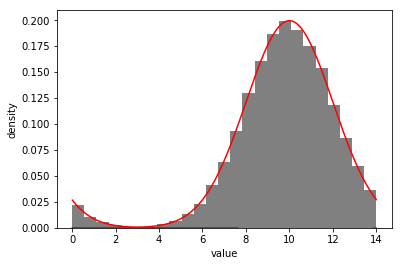

In [18]:
out = g.plot(show=True, wrap_at=14)

If we convert this [Gaussian distribution](../api/Gaussian.md) to a [Histogram](../api/Histogram.md), the wrapping will be maintained.  But note that the underlying distribution bins will be unwrapped, meaning that we can still fit a guassian pre-wrapping.

*** x passed to dist_func 1.6155756432948833 17.93878920058772
*** x passed to dist_func 1.6155756432948833 17.93878920058772


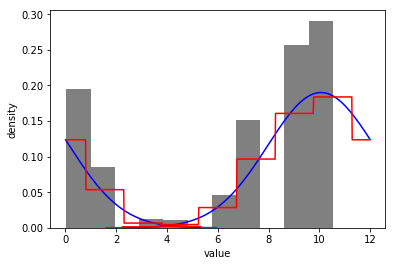

In [19]:
gh = g.to_histogram()
out = gh.plot(show=True, plot_gaussian=True)

# Example 2: Automatic Wrapping for Distributions with Angle Units

*** x passed to dist_func -15.961074740788494 36.28077597179099


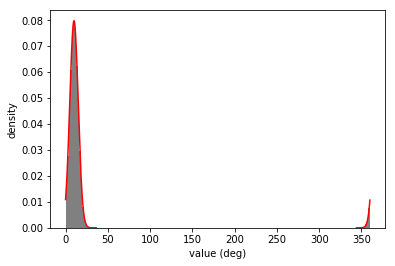

In [20]:
i = npdists.gaussian(10, 5)*u.deg
out = i.plot(show=True, bins=200)

*** x passed to dist_func -16.427789830134397 36.74148022888279


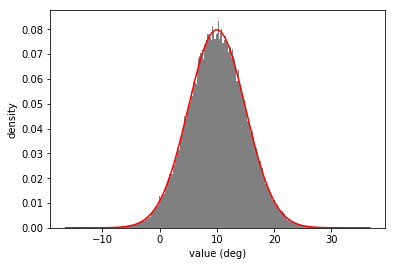

In [21]:
out = i.plot(show=True, wrap_at=False, bins=200)

*** x passed to dist_func -15.92686803420825 39.252433574361994
*** converting from deg to rad
*** before convert -0.2779762867275708 0.6850842052929833


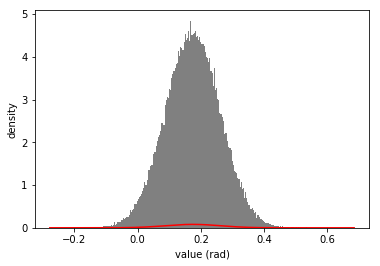

In [22]:
out = i.plot(show=True, bins=200, wrap_at=False, unit=u.rad, plot_sample=True, plot_dist=True)

*** x passed to dist_func -18.553466428676355 36.78880299644142
*** converting from deg to rad
*** before convert 0.0007249416713797086 359.9997590368544


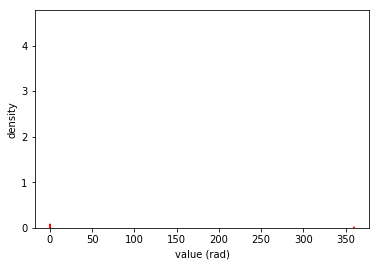

In [23]:
out = i.plot(show=True, bins=200, unit=u.rad, plot_sample=True, plot_dist=True)
# TODO: need to fix plot_dist for changing units

*** x passed to dist_func -0.30068478521714925 1.9344531736437773


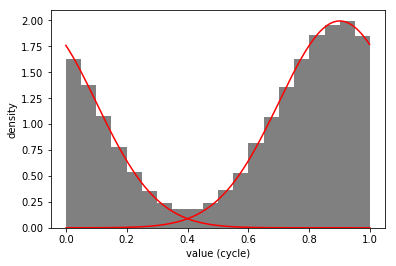

In [24]:
p = npdists.gaussian(0.9, 0.2)*u.cycle
out = p.plot(show=True, bins=20)

# Example 3: Uniform Distribution with `low` > `high`

*** x passed to dist_func 336.000059752378 383.9999211113669


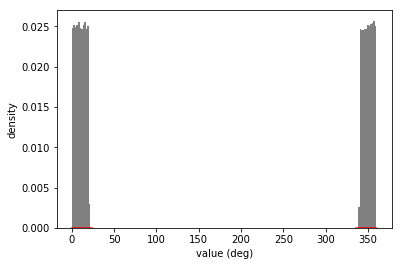

In [25]:
b = npdists.uniform(340, 20)*u.deg
out = b.plot(show=True, bins=200)

Note that passing `wrap_at` to [sample](../api/Uniform.sample.md) or [plot](../api/Uniform.plot.md) will only affect the wrapping _after_ sampling.  To change the "unwrapping" of the `low` and `high` bounds of the boxcar, you must change the attributes themselves.  For example:

In [26]:
print(b.low, b.high)

(340.0, 20.0)


In [27]:
print(b.get_wrap_at())

360


*** x passed to dist_func 336.00049870063856 383.996941327708


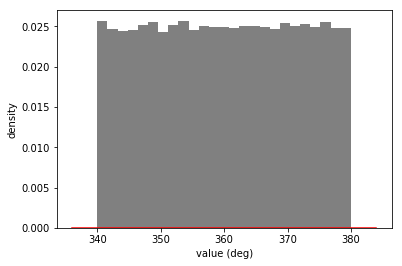

In [30]:
out = b.plot(show=True, wrap_at=False)
# TODO: need to fix plot_dist for this case